In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
deliveries=pd.read_csv("D:/Machine Learning Datasets/IPL Dataset/deliveries.csv/deliveries.csv")
matches=pd.read_csv("D:/Machine Learning Datasets/IPL Dataset/matches.csv")

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
pd.set_option("display.max_columns",100)

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
matches.id.nunique()

756

In [7]:
deliveries.match_id.nunique()

756

In [8]:
pd.to_datetime(matches.date).dt.year.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [9]:
data=deliveries.copy()

In [10]:
data.head(20)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [11]:
matches.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [12]:
data.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [15]:
matches.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [16]:
matches[matches["result"]=="no result"]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [17]:
data[data["match_id"]==301]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
70930,301,1,Delhi Daredevils,Pune Warriors,1,1,NV Ojha,DA Warner,AC Thomas,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
70931,301,1,Delhi Daredevils,Pune Warriors,1,2,DA Warner,NV Ojha,AC Thomas,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
70932,301,1,Delhi Daredevils,Pune Warriors,1,3,NV Ojha,DA Warner,AC Thomas,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
70933,301,1,Delhi Daredevils,Pune Warriors,1,4,NV Ojha,DA Warner,AC Thomas,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
70934,301,1,Delhi Daredevils,Pune Warriors,1,5,NV Ojha,DA Warner,AC Thomas,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70988,301,1,Delhi Daredevils,Pune Warriors,10,4,CA Ingram,Y Venugopal Rao,Yuvraj Singh,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN
70989,301,1,Delhi Daredevils,Pune Warriors,10,5,CA Ingram,Y Venugopal Rao,Yuvraj Singh,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
70990,301,1,Delhi Daredevils,Pune Warriors,10,6,CA Ingram,Y Venugopal Rao,Yuvraj Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
70991,301,1,Delhi Daredevils,Pune Warriors,10,7,Y Venugopal Rao,CA Ingram,Yuvraj Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [18]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [19]:
match=matches[(matches["result"]!="no result") & (matches["result"]!="tie")]
    

In [20]:
match["id"].nunique()

743

In [21]:
data=pd.merge(data,match,how="inner",left_on="match_id",right_on="id")

In [22]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [23]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [24]:
data.dl_applied.value_counts()

0    173164
1      3208
Name: dl_applied, dtype: int64

In [25]:
data.drop(['player_of_match',
       'umpire1', 'umpire2', 'umpire3'],axis=1,inplace=True)

In [26]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"


In [27]:
data=data[data["dl_applied"]==0]

In [28]:
data.drop("dl_applied",axis=1,inplace=True)

In [29]:
data["date"]=pd.to_datetime(data["date"])

In [30]:
data=data.sort_values("date")

In [31]:
data["date"].dt.year

13762     2008
13681     2008
13680     2008
13679     2008
13678     2008
          ... 
176211    2019
176212    2019
176213    2019
176200    2019
176371    2019
Name: date, Length: 173164, dtype: int64

In [32]:
data["match_id"]

13762        60
13681        60
13680        60
13679        60
13678        60
          ...  
176211    11415
176212    11415
176213    11415
176200    11415
176371    11415
Name: match_id, Length: 173164, dtype: int64

In [33]:
data.drop("id",axis=1,inplace=True)

In [34]:
data["over"]=data.apply(lambda x: float(str(x["over"]-1)+"."+str(x["ball"])),axis=1)

In [35]:
data.drop("ball",axis=1,inplace=True)

In [36]:
data.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,venue
13762,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,6.2,CL White,MV Boucher,AB Agarkar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium
13681,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,13.2,DJ Hussey,BB McCullum,SB Joshi,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium
13680,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,13.1,BB McCullum,DJ Hussey,SB Joshi,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium
13679,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,12.7,BB McCullum,DJ Hussey,JH Kallis,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium
13678,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,12.6,BB McCullum,DJ Hussey,JH Kallis,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium


In [37]:
data=data.sort_values(["date","inning","over"])

In [38]:
data.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,venue
13599,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium
13600,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium
13601,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium
13602,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium
13603,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium


In [39]:
data.groupby(["match_id","inning"])["total_runs"].sum()

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1448, dtype: int64

In [40]:
data.groupby(["match_id","inning"])["total_runs"].transform("sum").unique()

array([222,  82, 129, 240, 207, 132, 110, 165, 166, 112, 168, 142, 143,
       208, 202, 214, 217, 182, 116, 147, 135, 138, 152, 158, 154, 155,
       162, 178, 137, 191, 181, 196, 164, 151, 167, 169, 172, 156, 153,
       109, 133, 126, 127, 144, 148, 103, 104, 187, 124, 188, 140, 141,
       163, 204, 159, 194,  67,  68, 197, 150, 189, 175, 211, 176, 201,
       179, 174, 171, 145, 146, 122, 221, 180, 192,  87,  58, 101, 184,
       160, 173, 149, 139,  95, 119, 100, 157, 105, 107, 118, 123, 125,
       113, 161, 120, 134, 136, 102,  92, 170, 212, 190, 203, 218,  93,
       185, 183, 177, 131, 121, 246, 115, 223, 200, 186, 111, 130, 195,
        86,  99, 193,  81,  85, 231, 117,  74,  94, 205, 128,  97,  98,
       232, 198, 114, 108, 215, 209,  83, 263,  80,  79, 106, 206,  84,
        70,  71, 226, 199,  88, 235, 227, 248, 213,  49,  96,  66, 230,
        73,  78, 210,  89, 250,  76, 219, 233, 241], dtype=int64)

In [41]:
mat_ind=data.groupby(["match_id","inning"])["total_runs"].sum().index

In [42]:
a=data.groupby(["match_id","inning"])["total_runs"].sum().values

In [43]:
data["total_run_scored"]=None

In [44]:
for i in zip(mat_ind,a):
    data.loc[(data["match_id"]==i[0][0]) & (data["inning"]==i[0][1]),"total_run_scored"]=i[1]

In [45]:
data.head(30)

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,venue,total_run_scored
13599,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13600,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13601,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13602,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13603,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13604,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.6,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13605,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.7,BB McCullum,SC Ganguly,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13606,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1.1,BB McCullum,SC Ganguly,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13607,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1.2,BB McCullum,SC Ganguly,Z Khan,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13608,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1.3,BB McCullum,SC Ganguly,Z Khan,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222


In [46]:
data.drop("result",axis=1,inplace=True)

In [47]:
data.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
13599,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13600,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13601,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13602,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13603,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222


In [48]:
data

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
13599,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13600,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13601,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13602,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13603,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176367,11415,2,Chennai Super Kings,Mumbai Indians,19.2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176368,11415,2,Chennai Super Kings,Mumbai Indians,19.3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176369,11415,2,Chennai Super Kings,Mumbai Indians,19.4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176370,11415,2,Chennai Super Kings,Mumbai Indians,19.5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157


In [49]:
data.tail(30)

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
176342,11415,2,Chennai Super Kings,Mumbai Indians,15.1,DJ Bravo,SR Watson,SL Malinga,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176343,11415,2,Chennai Super Kings,Mumbai Indians,15.2,DJ Bravo,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176344,11415,2,Chennai Super Kings,Mumbai Indians,15.3,SR Watson,DJ Bravo,SL Malinga,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176345,11415,2,Chennai Super Kings,Mumbai Indians,15.4,SR Watson,DJ Bravo,SL Malinga,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176346,11415,2,Chennai Super Kings,Mumbai Indians,15.5,SR Watson,DJ Bravo,SL Malinga,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176347,11415,2,Chennai Super Kings,Mumbai Indians,15.6,SR Watson,DJ Bravo,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176348,11415,2,Chennai Super Kings,Mumbai Indians,16.1,SR Watson,DJ Bravo,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176349,11415,2,Chennai Super Kings,Mumbai Indians,16.2,DJ Bravo,SR Watson,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176350,11415,2,Chennai Super Kings,Mumbai Indians,16.3,SR Watson,DJ Bravo,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176351,11415,2,Chennai Super Kings,Mumbai Indians,16.4,SR Watson,DJ Bravo,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157


In [50]:
data

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
13599,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13600,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13601,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13602,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
13603,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176367,11415,2,Chennai Super Kings,Mumbai Indians,19.2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176368,11415,2,Chennai Super Kings,Mumbai Indians,19.3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176369,11415,2,Chennai Super Kings,Mumbai Indians,19.4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
176370,11415,2,Chennai Super Kings,Mumbai Indians,19.5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157


In [51]:
data.to_csv("IPLdata.csv",index=0)

In [52]:
pd.read_csv("IPLdata.csv")

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173159,11415,2,Chennai Super Kings,Mumbai Indians,19.2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
173160,11415,2,Chennai Super Kings,Mumbai Indians,19.3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
173161,11415,2,Chennai Super Kings,Mumbai Indians,19.4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157
173162,11415,2,Chennai Super Kings,Mumbai Indians,19.5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium,157


In [153]:
import pandas as pd
import numpy as np

In [154]:
data=pd.read_csv("IPLdata.csv")

In [155]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [156]:
data.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222


## First Innings Score Prediction

In [157]:
data[data['inning']==1].head(100)

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
5,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.6,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
6,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.7,BB McCullum,SC Ganguly,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
7,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1.1,BB McCullum,SC Ganguly,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
8,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1.2,BB McCullum,SC Ganguly,Z Khan,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
9,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1.3,BB McCullum,SC Ganguly,Z Khan,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222


In [158]:
data.loc[(data["match_id"]==60) & (data["inning"]==1) ,"total_runs"].cumsum()

0        1
1        1
2        2
3        2
4        2
      ... 
119    212
120    214
121    214
122    216
123    222
Name: total_runs, Length: 124, dtype: int64

In [159]:
df=data.copy()

In [160]:
df=df[df["inning"]==1]

In [161]:
for id_ in df.match_id.unique():
    df.loc[(df["match_id"]==id_),"ball_wise_total_runs"]=df.loc[(df["match_id"]==id_),"total_runs"].cumsum()

In [162]:
df[df["match_id"]==1]["total_runs"]

132188    0
132189    0
132190    4
132191    0
132192    2
         ..
132308    1
132309    6
132310    2
132311    0
132312    6
Name: total_runs, Length: 125, dtype: int64

In [163]:
for id_ in df.match_id.unique():
    df.loc[(df["match_id"]==id_),"extra_runs"]=df.loc[(df["match_id"]==id_),"extra_runs"].cumsum()

In [164]:
df[df["match_id"]==1]["extra_runs"]

132188    0
132189    0
132190    0
132191    0
132192    2
         ..
132308    7
132309    7
132310    7
132311    7
132312    7
Name: extra_runs, Length: 125, dtype: int64

In [165]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'win_by_runs', 'win_by_wickets', 'venue',
       'total_run_scored', 'ball_wise_total_runs'],
      dtype='object')

In [166]:
df.toss_decision.value_counts()

field    54388
bat      34843
Name: toss_decision, dtype: int64

In [167]:
df.toss_winner.value_counts()

Mumbai Indians                 12016
Kolkata Knight Riders          10707
Chennai Super Kings            10535
Kings XI Punjab                 9647
Royal Challengers Bangalore     9422
Rajasthan Royals                9395
Delhi Daredevils                9354
Sunrisers Hyderabad             5450
Deccan Chargers                 5329
Pune Warriors                   2454
Gujarat Lions                   1728
Delhi Capitals                  1118
Kochi Tuskers Kerala             865
Rising Pune Supergiant           713
Rising Pune Supergiants          498
Name: toss_winner, dtype: int64

In [168]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Rajasthan Royals', 'Chennai Super Kings',
       'Deccan Chargers', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [169]:
remove_columns=['Deccan Chargers','Kochi Tuskers Kerala', 'Pune Warriors','Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant']

In [170]:
df.replace({"Delhi Daredevils":'Delhi Capitals'},inplace=True)

In [171]:
df=df[~df.batting_team.isin(remove_columns)]

In [172]:
df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Kings XI Punjab',
       'Rajasthan Royals', 'Mumbai Indians', 'Chennai Super Kings',
       'Deccan Chargers', 'Kolkata Knight Riders', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [173]:
df=df[~df.bowling_team.isin(remove_columns)]

In [174]:
df.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored,ball_wise_total_runs
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,2,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,2,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,2,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0


In [175]:
df.drop("penalty_runs",axis=1,inplace=True)

In [176]:
df.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored,ball_wise_total_runs
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,1,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,2,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,2,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,2,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0


In [177]:
df.player_dismissed=np.where(df["player_dismissed"].isnull(),0,1)

In [178]:
df.is_super_over.unique()

array([0], dtype=int64)

In [179]:
df.drop("is_super_over",axis=1,inplace=True)

In [180]:
df.head(100)

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored,ball_wise_total_runs
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,1,0,0,1,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,1,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,1,0,0,0,0,2,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,2,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,2,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0
5,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.6,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,2,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0
6,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.7,BB McCullum,SC Ganguly,P Kumar,0,0,1,0,0,3,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,3.0
7,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1.1,BB McCullum,SC Ganguly,Z Khan,0,0,0,0,0,3,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,3.0
8,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1.2,BB McCullum,SC Ganguly,Z Khan,0,0,0,0,4,3,4,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,7.0
9,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1.3,BB McCullum,SC Ganguly,Z Khan,0,0,0,0,4,3,4,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,11.0


In [181]:
data["total_runs"].rolling(30).sum()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
173159    63.0
173160    65.0
173161    64.0
173162    66.0
173163    65.0
Name: total_runs, Length: 173164, dtype: float64

In [182]:
 df.loc[df.match_id==60,"total_runs"].rolling(30)

Rolling [window=30,center=False,axis=0]

In [183]:
for id_ in df.match_id.unique():
    df.loc[(df["match_id"]==id_),"wicket_fallen_till_now"]=df.loc[(df["match_id"]==id_),"player_dismissed"].cumsum()

In [184]:

for id_ in df.match_id.unique():
    df.loc[df.match_id==id_,"last_5_over_scored"]= df.loc[df.match_id==id_,"total_runs"].rolling(31).sum()
    df.loc[df.match_id==id_,"last_5_over_wicket_fallen"]= df.loc[df.match_id==id_,"player_dismissed"].rolling(31).sum()

In [185]:
df.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored,ball_wise_total_runs,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,1,0,0,1,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0,0.0,NaN,NaN
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,1,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0,0.0,NaN,NaN
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,1,0,0,0,0,2,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0,0.0,NaN,NaN
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,2,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0,0.0,NaN,NaN
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,2,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0,0.0,NaN,NaN


In [186]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'batsman',
       'non_striker', 'bowler', 'wide_runs', 'bye_runs', 'legbye_runs',
       'noball_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder', 'season', 'city',
       'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'win_by_runs', 'win_by_wickets', 'venue', 'total_run_scored',
       'ball_wise_total_runs', 'wicket_fallen_till_now', 'last_5_over_scored',
       'last_5_over_wicket_fallen'],
      dtype='object')

In [187]:
df.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored,ball_wise_total_runs,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,1,0,0,1,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0,0.0,NaN,NaN
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,1,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,1.0,0.0,NaN,NaN
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,1,0,0,0,0,2,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0,0.0,NaN,NaN
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,2,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0,0.0,NaN,NaN
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,2,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,2.0,0.0,NaN,NaN


In [ ]:
for id_ in df.match_id.unique():
      for bat_man in df[df["match_id"]==id_].batsman.unique():
            df.loc[(df["match_id"]==id_)&(df["batsman"]==bat_man),"batting_bats_man_run"]=df[df["match_id"]==id_][df["batsman"]==bat_man]["batsman_runs"].cumsum()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head(100)

In [ ]:
df1=df[df["over"]>4.6]

In [ ]:
df1.head()

In [ ]:
df1.drop(["batsman","non_striker","bowler","wide_runs","bye_runs","legbye_runs","noball_runs"],axis=1,inplace=True   )

In [ ]:
df1.head()

In [ ]:
df1.drop("dismissal_kind",axis=1,inplace=True)

In [ ]:
df.head()

In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("IPLFinal.csv")

In [6]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [7]:
data.head(100)

,match_id,inning,batting_team,bowling_team,over,batsman_runs,extra_runs,total_runs,player_dismissed,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored,ball_wise_total_runs,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,5.1,1,10,1,0,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,61.0,0.0,60.0,0.0,41.0
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,5.2,0,10,0,1,JH Kallis,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,61.0,1.0,59.0,1.0,10.0
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,5.3,0,10,0,0,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,61.0,1.0,59.0,1.0,0.0
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,5.4,0,10,0,0,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,61.0,1.0,59.0,1.0,0.0
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,5.5,0,10,0,0,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,61.0,1.0,59.0,1.0,0.0
5,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,5.6,0,10,0,0,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,61.0,1.0,58.0,1.0,0.0
6,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,6.1,1,10,1,0,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,62.0,1.0,59.0,1.0,42.0
7,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,6.2,1,10,1,0,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,63.0,1.0,56.0,1.0,1.0
8,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,6.3,1,10,1,0,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,64.0,1.0,53.0,1.0,43.0
9,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,6.4,2,10,2,0,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,66.0,1.0,49.0,1.0,3.0


In [ ]:
data.drop(["innings","total_runs","batsman_runs","player_dismissed","fielder","season","city",)

In [10]:
data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'fielder', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'win_by_runs', 'win_by_wickets', 'venue',
       'total_run_scored', 'ball_wise_total_runs', 'wicket_fallen_till_now',
       'last_5_over_scored', 'last_5_over_wicket_fallen',
       'batting_bats_man_run'],
      dtype='object')

In [11]:
df=data[[ 'date','batting_team', 'bowling_team', 'over','extra_runs','ball_wise_total_runs', 'wicket_fallen_till_now',
       'last_5_over_scored', 'last_5_over_wicket_fallen',
       'batting_bats_man_run','total_run_scored']]

In [15]:
df.head()

,date,batting_team,bowling_team,over,extra_runs_till_now,ball_wise_total_runs,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run,total_run_scored
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.1,10,61.0,0.0,60.0,0.0,41.0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.2,10,61.0,1.0,59.0,1.0,10.0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.3,10,61.0,1.0,59.0,1.0,0.0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.4,10,61.0,1.0,59.0,1.0,0.0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.5,10,61.0,1.0,59.0,1.0,0.0,222


In [16]:
df.rename(columns={"ball_wise_total_runs":"runs_scored_till_now"},inplace=True)
df.rename(columns={"extra_runs":"extra_runs_till_now"},inplace=True)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df.rename(columns={"extra_runs":"extra_runs_till_now"},inplace=True)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df.head()

,date,batting_team,bowling_team,over,extra_runs_till_now,runs_scored_till_now,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run,total_run_scored
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.1,10,61.0,0.0,60.0,0.0,41.0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.2,10,61.0,1.0,59.0,1.0,10.0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.3,10,61.0,1.0,59.0,1.0,0.0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.4,10,61.0,1.0,59.0,1.0,0.0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.5,10,61.0,1.0,59.0,1.0,0.0,222


In [21]:
df.date=pd.to_datetime(df.date)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df["month"]=df.date.dt.month

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
import seaborn as sns
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

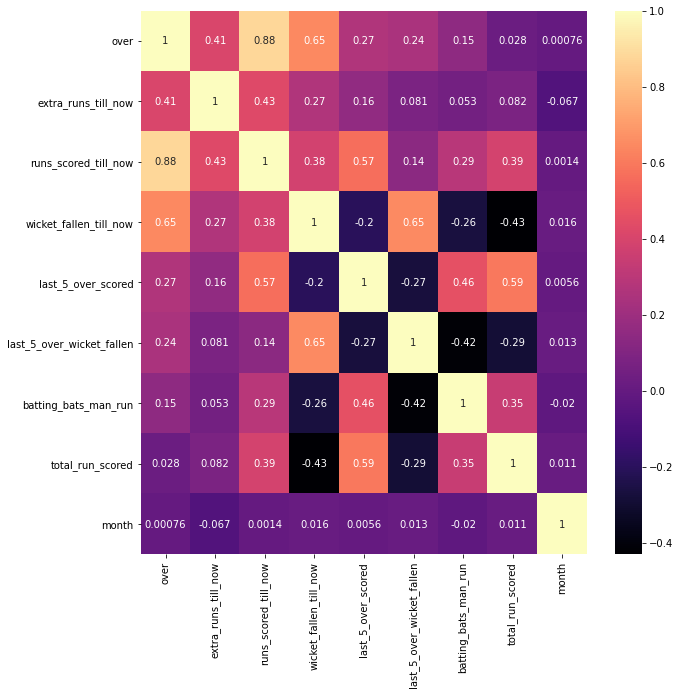

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="magma")

In [30]:
df.head()

,date,batting_team,bowling_team,over,extra_runs_till_now,runs_scored_till_now,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run,total_run_scored,month
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.1,10,61.0,0.0,60.0,0.0,41.0,222,4
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.2,10,61.0,1.0,59.0,1.0,10.0,222,4
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.3,10,61.0,1.0,59.0,1.0,0.0,222,4
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.4,10,61.0,1.0,59.0,1.0,0.0,222,4
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,5.5,10,61.0,1.0,59.0,1.0,0.0,222,4


In [32]:
df.bowling_team.nunique()

8

In [33]:
df.shape

(50232, 12)

In [34]:
df.isnull().sum()

date                         0
batting_team                 0
bowling_team                 0
over                         0
extra_runs_till_now          0
runs_scored_till_now         0
wicket_fallen_till_now       0
last_5_over_scored           0
last_5_over_wicket_fallen    0
batting_bats_man_run         0
total_run_scored             0
month                        0
dtype: int64

In [35]:
df1=pd.get_dummies(df,columns=["batting_team","bowling_team"],drop_first=True)

In [37]:
df1.columns

Index(['date', 'over', 'extra_runs_till_now', 'runs_scored_till_now',
       'wicket_fallen_till_now', 'last_5_over_scored',
       'last_5_over_wicket_fallen', 'batting_bats_man_run', 'total_run_scored',
       'month', 'batting_team_Delhi Capitals', 'batting_team_Kings XI Punjab',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Delhi Capitals',
       'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad'],
      dtype='object')

In [38]:
df2=df1[['date','month','batting_team_Delhi Capitals', 'batting_team_Kings XI Punjab',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Delhi Capitals',
       'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad','over', 'extra_runs_till_now', 'runs_scored_till_now',
       'wicket_fallen_till_now', 'last_5_over_scored',
       'last_5_over_wicket_fallen', 'batting_bats_man_run', 'total_run_scored',]]

In [39]:
df2.head()

,date,month,batting_team_Delhi Capitals,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Delhi Capitals,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,over,extra_runs_till_now,runs_scored_till_now,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run,total_run_scored
0,2008-04-18,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.1,10,61.0,0.0,60.0,0.0,41.0,222
1,2008-04-18,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.2,10,61.0,1.0,59.0,1.0,10.0,222
2,2008-04-18,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.3,10,61.0,1.0,59.0,1.0,0.0,222
3,2008-04-18,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.4,10,61.0,1.0,59.0,1.0,0.0,222
4,2008-04-18,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.5,10,61.0,1.0,59.0,1.0,0.0,222


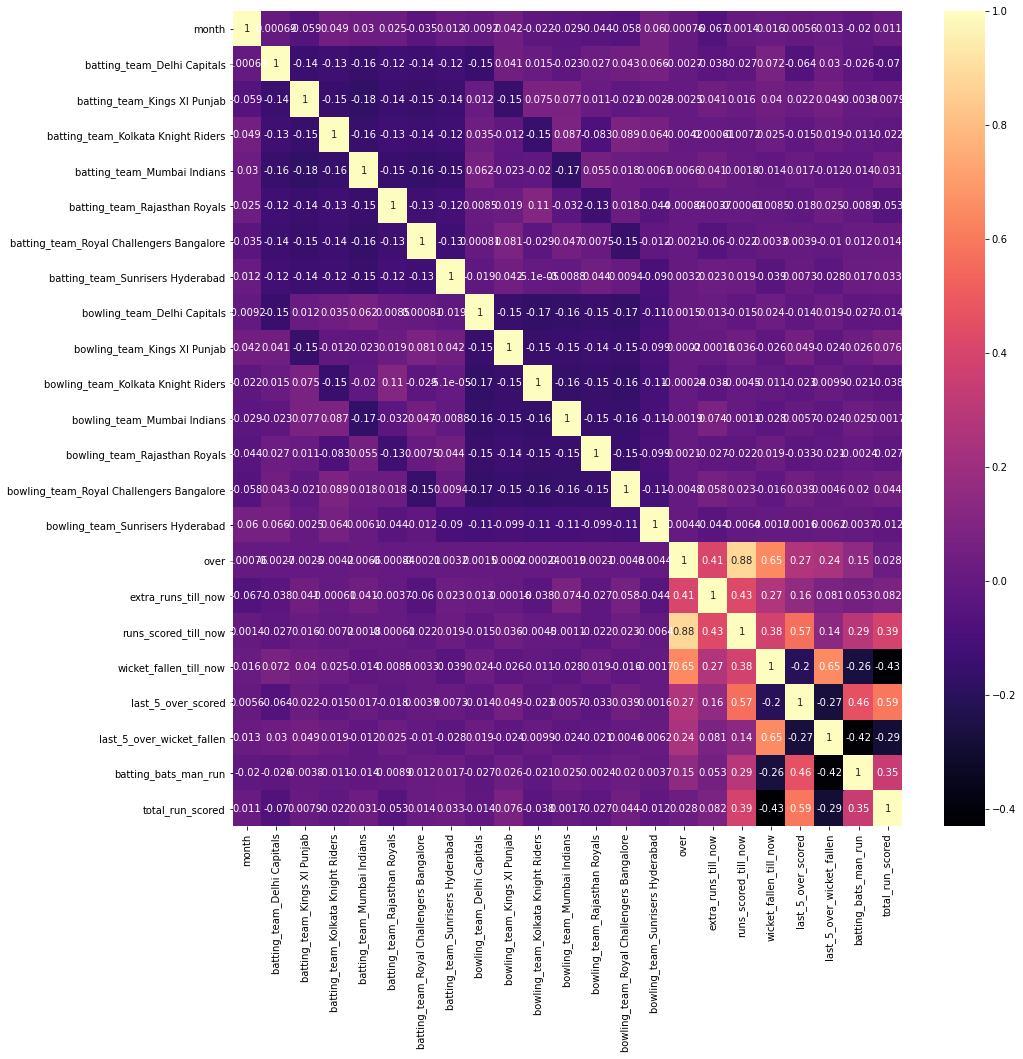

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,cmap="magma")

In [45]:
df2.corr()[ 'total_run_scored'].sort_values(ascending=False)

total_run_scored                            1.000000
last_5_over_scored                          0.592330
runs_scored_till_now                        0.387571
batting_bats_man_run                        0.345328
extra_runs_till_now                         0.081918
bowling_team_Kings XI Punjab                0.075642
bowling_team_Royal Challengers Bangalore    0.044043
batting_team_Sunrisers Hyderabad            0.032860
batting_team_Mumbai Indians                 0.030527
over                                        0.027978
batting_team_Royal Challengers Bangalore    0.013907
month                                       0.011294
batting_team_Kings XI Punjab                0.007934
bowling_team_Mumbai Indians                 0.001721
bowling_team_Sunrisers Hyderabad           -0.012000
bowling_team_Delhi Capitals                -0.014004
batting_team_Kolkata Knight Riders         -0.022207
bowling_team_Rajasthan Royals              -0.026708
bowling_team_Kolkata Knight Riders         -0.

In [47]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(df2.drop(["total_run_scored","date"],axis=1),df2["total_run_scored"],test_size=0.2,random_state=0)       

In [55]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [49]:
lr=LinearRegression()

In [50]:
lr.fit(train_X,train_y)

LinearRegression()

In [51]:
lr.score(train_X,train_y)

0.6443475846695234

In [52]:
lr.score(test_X,test_y)

0.6505976705922312

In [53]:
pred=lr.predict(test_X)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


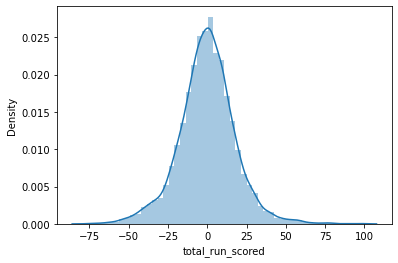

In [60]:
sns.distplot(pred-test_y)

In [56]:
ls=Lasso()

In [57]:
ls.fit(train_X,train_y)

Lasso()

In [58]:
ls.score(train_X,train_y)

0.6355711033213844

In [59]:
ls.score(test_X,test_y)

0.6425009632711092

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [62]:
rf.fit(train_X,train_y)

RandomForestRegressor()

In [64]:
rf.score(train_X,train_y)

0.9930658385136252

In [65]:
rf.score(test_X,test_y)

0.9496183827405371

In [66]:
pre_rf=rf.predict(test_X)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


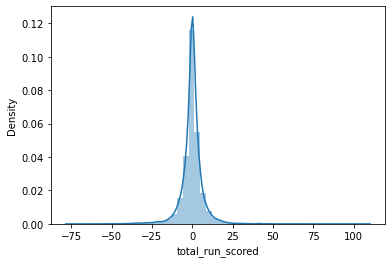

In [67]:
sns.distplot(pre_rf-test_y)

In [74]:
pd.DataFrame(rf.feature_importances_,index=df2.drop(["total_run_scored","date"],axis=1).columns).sort_values(0,ascending=False)

,0
last_5_over_scored,0.300073
runs_scored_till_now,0.200757
wicket_fallen_till_now,0.148991
over,0.081405
extra_runs_till_now,0.057142
month,0.039233
batting_bats_man_run,0.019701
last_5_over_wicket_fallen,0.014801
batting_team_Royal Challengers Bangalore,0.011390
bowling_team_Kolkata Knight Riders,0.011329


In [76]:
df2.month.nunique()

12

In [78]:
df2.drop("date",axis=1,inplace=True)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
df2.to_csv("ipl_analysis.csv",index=0)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("ipl_analysis.csv")

In [3]:
data.head()

,month,batting_team_Delhi Capitals,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Delhi Capitals,bowling_team_Kings XI Punjab,...,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,over,extra_runs_till_now,runs_scored_till_now,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run,total_run_scored
0,4,0,0,1,0,0,0,0,0,0,...,1,0,5.1,10,61.0,0.0,60.0,0.0,41.0,222
1,4,0,0,1,0,0,0,0,0,0,...,1,0,5.2,10,61.0,1.0,59.0,1.0,10.0,222
2,4,0,0,1,0,0,0,0,0,0,...,1,0,5.3,10,61.0,1.0,59.0,1.0,0.0,222
3,4,0,0,1,0,0,0,0,0,0,...,1,0,5.4,10,61.0,1.0,59.0,1.0,0.0,222
4,4,0,0,1,0,0,0,0,0,0,...,1,0,5.5,10,61.0,1.0,59.0,1.0,0.0,222


In [7]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [6]:
train_X,test_X,train_y,test_y=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.2,random_state=0)

In [18]:
lr=LinearRegression()
ls=Lasso()
ri=Ridge()
rf=RandomForestRegressor(n_jobs=-1)
gra=GradientBoostingRegressor()

In [40]:
def check_score(model):
    
    print(f"The train mean_squared score is {mean_squared_error(train_y,model.predict(train_X))}")
    print("---------------------------------------------------")
    print(f"The train mean_absolute score is {mean_absolute_error(train_y,model.predict(train_X))}")
    print("---------------------------------------------------")
    print(f"The test mean_squared score is {mean_squared_error(test_y,model.predict(test_X))}")
    print("---------------------------------------------------")
    print(f"The test mean_absolute_score is {mean_absolute_error(test_y,model.predict(test_X))}")
    print("---------------------------------------------------")


In [37]:
scores=cross_val_score(RandomForestRegressor(n_estimators=100,max_depth=40,n_jobs=-1),train_X,train_y,cv=5,scoring="neg_mean_squared_error",n_jobs=-1) 
print(scores)
print("-----------")
print(np.mean(scores))
print("-----------")
print(np.std(scores))


[-56.87996359 -61.36108264 -58.25317132 -57.40686032 -61.47084476]
-----------
-59.07438452656463
-----------
1.9617604972103426


In [38]:
rf=RandomForestRegressor(n_estimators=100,max_depth=40,n_jobs=-1)

In [39]:
rf.fit(train_X,train_y)

RandomForestRegressor(max_depth=40, n_jobs=-1)

In [41]:
check_score(rf)

The train mean_squared score is 6.503525587305142
---------------------------------------------------
The train mean_absolute score is 1.5086770010131711
---------------------------------------------------
The test mean_squared score is 46.970445085620035
---------------------------------------------------
The test mean_absolute_score is 4.052194514353965
---------------------------------------------------


In [42]:
pred=rf.predict(test_X)
import seaborn as sns


c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


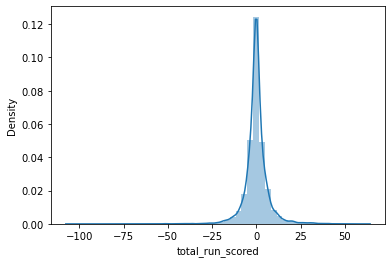

In [46]:
sns.distplot(test_y-pred)

In [47]:
import matplotlib.pyplot as plt

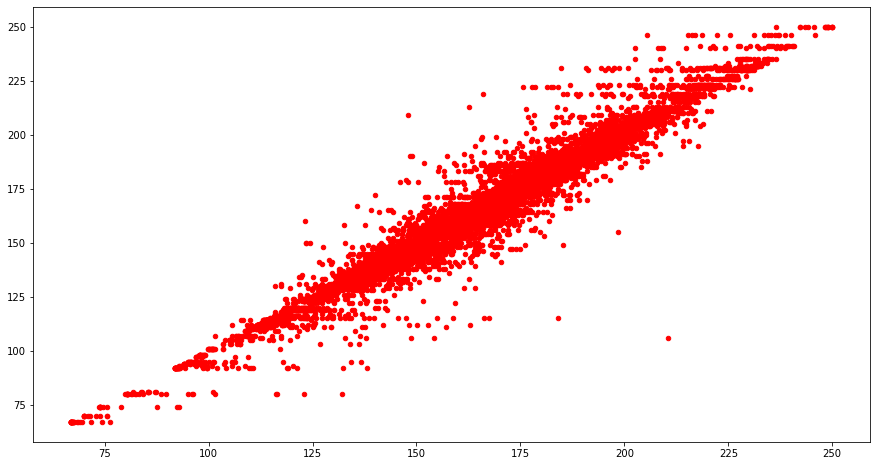

In [49]:
plt.figure(figsize=(15,8))
plt.scatter(x=pred,y=test_y,s=20,color="red")

In [1]:
import pickle


In [54]:
with open("ipl_mode.pkl","wb") as f:
    pickle.dump(rf,f)

In [18]:
with open("myiplmodel.pkl","rb") as f:
   rf=pickle.load(f)

UnpicklingError: invalid load key, 'x'.

In [19]:
rf=load("myiplmodel.pkl")

In [6]:
from joblib import load,dump
rf=load("myiplmodel.pkl")

In [17]:
dump(rf,"myiplmodel.pkl",compress=9)

['myiplmodel.pkl']

list

In [3]:
import numpy as np

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [20]:
import numpy as np

In [21]:
mon=input("Write The Month Name In which match is Happenning")
try:
     if mon=="January":
        a=np.array([[1]])
     elif mon=="February":
        a=np.array([[2]])
     elif mon=="March":
        a=np.array([[3]])
     elif mon=="April":
        a=np.array([[4]])
     elif mon=="May":
        a=np.array([[5]])
     elif mon=="June":
        a=np.array([[6]])
     elif mon=="July":
        a=np.array([[7]])
     elif mon=="August":
        a=np.array([[8]])
     elif mon=="September":
        a=np.array([[9]])
     elif mon=="October":
        a=np.array([[10]])
     elif mon=="November":
        a=np.array([[11]])
     elif mon=="December":
        a=np.array([[12]])
     else:
        raise Exception
except:
     print("Please Write Appropriate Month Name")
     mon=input("Write Month Name again")   
     if mon=="January":
        a=np.array([[1]])
     elif mon=="February":
        a=np.array([[2]])
     elif mon=="March":
        a=np.array([[3]])
     elif mon=="April":
        a=np.array([[4]])
     elif mon=="May":
        a=np.array([[5]])
     elif mon=="June":
        a=np.array([[6]])
     elif mon=="July":
        a=np.array([[7]])
     elif mon=="August":
        a=np.array([[8]])
     elif mon=="September":
        a=np.array([[9]])
     elif mon=="October":
        a=np.array([[10]])
     elif mon=="November":
        a=np.array([[11]])
     elif mon=="December":
        a=np.array([[12]])
     else:
        raise Exception("Invalid Month Name")
try: 
     bat=input("Write Batting Team Name")
     if bat=="Delhi Capitals":
         a=np.concatenate((a,[[1,0,0,0,0,0,0]]),axis=1)
     elif bat=="Kings XI Punjab":
         a=np.concatenate((a,[[0,1,0,0,0,0,0]]),axis=1)
     elif bat=="Kolkata Knight Riders":
        a=np.concatenate((a,[[0,0,1,0,0,0,0]]),axis=1)
     elif bat=="Mumbai Indians":
        a=np.concatenate((a,[[0,0,0,1,0,0,0]]),axis=1)
     elif bat=="Rajasthan Royals":
        a=np.concatenate((a,[[0,0,0,0,1,0,0]]),axis=1)
     elif bat=="Royal Challengers Bangalore":
        a=np.concatenate((a,[[0,0,0,0,0,1,0]]),axis=1)
     elif bat=="Sunrisers Hyderabad":
        a=np.concatenate((a,[[0,0,0,0,0,0,1]]),axis=1)
     elif bat=="Chennai Super Kings":
        a=np.concatenate((a,[[0,0,0,0,0,0,0]]),axis=1)
     else:
        raise Exception
except:
       print("Write Appropiate Batting Team Name")
       bat=input("Write Batting Team Name Again")
       if bat=="Delhi Capitals":
         a=np.concatenate((a,[[1,0,0,0,0,0,0]]),axis=1)
       elif bat=="Kings XI Punjab":
         a=np.concatenate((a,[[0,1,0,0,0,0,0]]),axis=1)
       elif bat=="Kolkata Knight Riders":
        a=np.concatenate((a,[[0,0,1,0,0,0,0]]),axis=1)
       elif bat=="Mumbai Indians":
        a=np.concatenate((a,[[0,0,0,1,0,0,0]]),axis=1)
       elif bat=="Rajasthan Royals":
        a=np.concatenate((a,[[0,0,0,0,1,0,0]]),axis=1)
       elif bat=="Royal Challengers Bangalore":
        a=np.concatenate((a,[[0,0,0,0,0,1,0]]),axis=1)
       elif bat=="Sunrisers Hyderabad":
        a=np.concatenate((a,[[0,0,0,0,0,0,1]]),axis=1)
       elif bat=="Chennai Super Kings":
        a=np.concatenate((a,[[0,0,0,0,0,0,0]]),axis=1)
       else:
        raise Exception("Datatype Error")
try: 
     bowl=input("Write Bowling Team Name")
     if  bowl=="Delhi Capitals":
         a=np.concatenate((a,[[1,0,0,0,0,0,0]]),axis=1)
     elif bowl=="Kings XI Punjab":
         a=np.concatenate((a,[[0,1,0,0,0,0,0]]),axis=1)
     elif bowl=="Kolkata Knight Riders":
        a=np.concatenate((a,[[0,0,1,0,0,0,0]]),axis=1)
     elif bowl=="Mumbai Indians":
        a=np.concatenate((a,[[0,0,0,1,0,0,0]]),axis=1)
     elif bowl=="Rajasthan Royals":
        a=np.concatenate((a,[[0,0,0,0,1,0,0]]),axis=1)
     elif bowl=="Royal Challengers Bangalore":
        a=np.concatenate((a,[[0,0,0,0,0,1,0]]),axis=1)
     elif bowl=="Sunrisers Hyderabad":
        a=np.concatenate((a,[[0,0,0,0,0,0,1]]),axis=1)
     elif bowl=="Chennai Super Kings":
        a=np.concatenate((a,[[0,0,0,0,0,0,0]]),axis=1)
     else:
        raise Exception
except:
       print("Write Appropiate Bowling Team Name")
       bowl=input("Write Bowling  Team Name Again")
       if bowl=="Delhi Capitals":
         a=np.concatenate((a,[[1,0,0,0,0,0,0]]),axis=1)
       elif bowl=="Kings XI Punjab":
         a=np.concatenate((a,[[0,1,0,0,0,0,0]]),axis=1)
       elif bowl=="Kolkata Knight Riders":
        a=np.concatenate((a,[[0,0,1,0,0,0,0]]),axis=1)
       elif bowl=="Mumbai Indians":
        a=np.concatenate((a,[[0,0,0,1,0,0,0]]),axis=1)
       elif bowl=="Rajasthan Royals":
        a=np.concatenate((a,[[0,0,0,0,1,0,0]]),axis=1)
       elif bowl=="Royal Challengers Bangalore":
        a=np.concatenate((a,[[0,0,0,0,0,1,0]]),axis=1)
       elif bowl=="Sunrisers Hyderabad":
        a=np.concatenate((a,[[0,0,0,0,0,0,1]]),axis=1)
       elif bowl=="Chennai Super Kings":
        a=np.concatenate((a,[[0,0,0,0,0,0,0]]),axis=1)
       else:
         raise Exception("Invalid Bowling Team Name")
try:
     overs=float(input("Write current Over value"))
     try : 
           if overs<5.0:
              raise Exception
     except:
            print("please write over greater than 5")
            overs=float(input("Write current Over value again"))

except:
       print("write Appropiate Over")
       overs=float(input("Write current Over value again"))
a=np.concatenate((a,[[overs]]),axis=1)            
extras=int(input("Write total extra_runs till now"))
a=np.concatenate((a,[[extras]]),axis=1)
runs=int(input("Write runs scored till now"))
a=np.concatenate((a,[[runs]]),axis=1)
wickets=int(input("Write wicket fallen till now"))
a=np.concatenate((a,[[wickets]]),axis=1)
last_runs=int(input("Write run_scored in last 5 overs"))
a=np.concatenate((a,[[last_runs]]),axis=1)
last_wicket=int(input("Write wicket fallen in last 5 overs"))
a=np.concatenate((a,[[last_wicket]]),axis=1)
bats_runs=int(input("Write current batsmn run"))
a=np.concatenate((a,[[bats_runs]]),axis=1)
res=rf.predict(a)
for val in res: 
    print("The first innings score will be ",int(val))            

Write The Month Name In which match is HappenningApril
Write Batting Team NameChennai Super Kings
Write Bowling Team NameSunrisers Hyderabad
Write current Over value6.6
Write total extra_runs till now3
Write runs scored till now42
Write wicket fallen till now4
Write run_scored in last 5 overs3
Write wicket fallen in last 5 overs3
Write current batsmn run5
The first innings score will be  122


In [ ]:
if mon=="January":
        a=np.array([[1]])
     elif mon=="February":
        a=np.array([[2]])
     elif mon=="March":
        a=np.array([[3]])
     elif mon=="April":
        a=np.array([[4]])
     elif mon=="May":
        a=np.array([[5]])
     elif mon=="June":
        a=np.array([[6]])
     elif mon=="July":
        a=np.array([[7]])
     elif mon=="August":
        a=np.array([[8]])
     elif mon=="September":
        a=np.array([[9]])
     elif mon=="October":
        a=np.array([[10]])
     elif mon=="November":
        a=np.array([[11]])
     elif mon=="December":
        a=np.array([[12]])
if bat=="Delhi Capitals":
         a=np.concatenate((a,[[1,0,0,0,0,0,0]]),axis=1)
     elif bat=="Kings XI Punjab":
         a=np.concatenate((a,[[0,1,0,0,0,0,0]]),axis=1)
     elif bat=="Kolkata Knight Riders":
        a=np.concatenate((a,[[0,0,1,0,0,0,0]]),axis=1)
     elif bat=="Mumbai Indians":
        a=np.concatenate((a,[[0,0,0,1,0,0,0]]),axis=1)
     elif bat=="Rajasthan Royals":
        a=np.concatenate((a,[[0,0,0,0,1,0,0]]),axis=1)
     elif bat=="Royal Challengers Bangalore":
        a=np.concatenate((a,[[0,0,0,0,0,1,0]]),axis=1)
     elif bat=="Sunrisers Hyderabad":
        a=np.concatenate((a,[[0,0,0,0,0,0,1]]),axis=1)
     elif bat=="Chennai Super Kings":
        a=np.concatenate((a,[[0,0,0,0,0,0,0]]),axis=1)
if bowl=="Delhi Capitals":
         a=np.concatenate((a,[[1,0,0,0,0,0,0]]),axis=1)
     elif bat=="Kings XI Punjab":
         a=np.concatenate((a,[[0,1,0,0,0,0,0]]),axis=1)
     elif bat=="Kolkata Knight Riders":
        a=np.concatenate((a,[[0,0,1,0,0,0,0]]),axis=1)
     elif bat=="Mumbai Indians":
        a=np.concatenate((a,[[0,0,0,1,0,0,0]]),axis=1)
     elif bat=="Rajasthan Royals":
        a=np.concatenate((a,[[0,0,0,0,1,0,0]]),axis=1)
     elif bat=="Royal Challengers Bangalore":
        a=np.concatenate((a,[[0,0,0,0,0,1,0]]),axis=1)
     elif bat=="Sunrisers Hyderabad":
        a=np.concatenate((a,[[0,0,0,0,0,0,1]]),axis=1)
     elif bat=="Chennai Super Kings":
        a=np.concatenate((a,[[0,0,0,0,0,0,0]]),axis=1)  
a=np.concatenate((a,[[overs]]),axis=1)  
a=np.concatenate((a,[[extras]]),axis=1)
a=np.concatenate((a,[[runs]]),axis=1)
a=np.concatenate((a,[[wickets]]),axis=1)
a=np.concatenate((a,[[last_runs]]),axis=1)
a=np.concatenate((a,[[last_wicket]]),axis=1)
a=np.concatenate((a,[[bats_runs]]),axis=1)
res=rf.predict(a)
for val in res: 
    print("The first innings score will be ",int(val))            

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("IPLdata.csv")

In [3]:
pd.set_option("display.max_columns",100)

In [4]:
data.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222


In [5]:
data[data["inning"]==1].head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222


In [6]:
data[data["inning"]==2].head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
124,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.1,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,82
125,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.2,W Jaffer,R Dravid,AB Dinda,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,82
126,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.3,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,82
127,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.4,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,82
128,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.5,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,82


In [7]:
grp=data.groupby(["match_id","inning"])["total_run_scored"].max().unstack().rename(columns={1:"innings_1",2:"inngings_2"})

In [8]:
data[data["match_id"]==1]

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored
132188,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",207
132189,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",207
132190,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",207
132191,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",207
132192,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132431,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18.6,YS Chahal,A Choudhary,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",172
132432,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19.1,YS Chahal,A Choudhary,BCJ Cutting,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",172
132433,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19.2,YS Chahal,A Choudhary,BCJ Cutting,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",172
132434,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19.3,A Choudhary,YS Chahal,BCJ Cutting,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",172


In [9]:
grp=grp.reset_index()

In [10]:
df=pd.merge(data,grp,on="match_id")

In [11]:
df.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored,innings_1,inngings_2
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82


In [12]:
df.rename(columns={"innings_1":"first_innings_run","inngings_2":"second_innings_run"},inplace=True)

In [13]:
df.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,total_run_scored,first_innings_run,second_innings_run
0,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82
1,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82
2,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82
3,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82
4,60,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,222,82


In [14]:
df.drop("total_run_scored",axis=1,inplace=True)

## Second Innings Score Prediction And Match Winner Prediction

In [15]:
df1=df[df["inning"]==2]

In [16]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,first_innings_run,second_innings_run
124,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.1,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82
125,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.2,W Jaffer,R Dravid,AB Dinda,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82
126,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.3,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82
127,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.4,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82
128,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.5,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82


In [18]:
df1.drop("is_super_over",axis=1,inplace=True)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df1.bowling_team.unique()

array(['Kolkata Knight Riders', 'Rajasthan Royals', 'Chennai Super Kings',
       'Deccan Chargers', 'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

0     39308
6      9632
7      8747
5      8416
8      5350
4      4777
9      3593
3      2205
10      808
2       729
1       368
Name: win_by_wickets, dtype: int64

In [20]:
remove_columns=['Deccan Chargers','Kochi Tuskers Kerala', 'Pune Warriors','Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant']

In [22]:
df2=df1[~(df1.batting_team.isin(remove_columns) | df1.bowling_team.isin(remove_columns))]

In [27]:
df2.batting_team.unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Kings XI Punjab',
       'Rajasthan Royals', 'Mumbai Indians', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad'], dtype=object)

In [28]:
df2.bowling_team.unique()

array(['Kolkata Knight Riders', 'Rajasthan Royals', 'Chennai Super Kings',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'Sunrisers Hyderabad'], dtype=object)

In [26]:
df2.replace({"Delhi Daredevils":"Delhi Capitals"},inplace=True)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [29]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,first_innings_run,second_innings_run
124,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.1,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82
125,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.2,W Jaffer,R Dravid,AB Dinda,1,0,0,0,0,0,1,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82
126,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.3,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82
127,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.4,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82
128,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.5,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,1,0,1,NaN,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82


In [33]:
import numpy as np

In [93]:
for id_ in df2.match_id.unique():
    df2.loc[(df2["match_id"]==id_),"ball_wise_total_runs"]=df2.loc[(df["match_id"]==id_),"total_runs"].cumsum()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
df2.player_dismissed=np.where(df2["player_dismissed"].isnull(),0,1)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [35]:
for id_ in df2.match_id.unique():
    df2.loc[(df2["match_id"]==id_),"wicket_fallen_till_now"]=df2.loc[(df2["match_id"]==id_),"player_dismissed"].cumsum()
for id_ in df2.match_id.unique():
    df2.loc[df2.match_id==id_,"last_5_over_scored"]= df2.loc[df2.match_id==id_,"total_runs"].rolling(31).sum()
    df2.loc[df2.match_id==id_,"last_5_over_wicket_fallen"]= df2.loc[df2.match_id==id_,"player_dismissed"].rolling(31).sum()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
for id_ in df2.match_id.unique():
      for bat_man in df2[df2["match_id"]==id_].batsman.unique():
            df2.loc[(df2["match_id"]==id_)&(df2["batsman"]==bat_man),"batting_bats_man_run"]=df2[df2["match_id"]==id_][df2["batsman"]==bat_man]["batsman_runs"].cumsum()

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,first_innings_run,second_innings_run,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run
124,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.1,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,1,0,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,1.0
125,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.2,W Jaffer,R Dravid,AB Dinda,1,0,0,0,0,0,1,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,0.0
126,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.3,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,0,0,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,0.0
127,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.4,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,1,0,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,1.0
128,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.5,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,1,0,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,2.0


In [40]:
df2[["batsman","non_striker","batsman_runs","batting_bats_man_run"]].head(5)

,batsman,non_striker,batsman_runs,batting_bats_man_run
124,R Dravid,W Jaffer,1,1.0
125,W Jaffer,R Dravid,0,0.0
126,W Jaffer,R Dravid,0,0.0
127,W Jaffer,R Dravid,1,1.0
128,R Dravid,W Jaffer,1,2.0


In [95]:
for id_ in df2.match_id.unique():
    df2.loc[(df2["match_id"]==id_),"extra_runs"]=df2.loc[(df2["match_id"]==id_),"extra_runs"].cumsum()

In [82]:
df2.head(11)

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,first_innings_run,second_innings_run,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run
124,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.1,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,1,0,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,1.0
125,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.2,W Jaffer,R Dravid,AB Dinda,1,0,0,0,0,0,1,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,0.0
126,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.3,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,0,0,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,0.0
127,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.4,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,1,0,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,1.0
128,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.5,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,1,0,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,2.0
129,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.6,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,0,0,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,1.0
130,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.7,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,0,0,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,1.0
131,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,1.1,R Dravid,W Jaffer,I Sharma,0,0,0,0,0,0,0,0,1,bowled,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,1.0,NaN,NaN,2.0
132,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,1.2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,1.0,NaN,NaN,0.0
133,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,1.3,V Kohli,W Jaffer,I Sharma,0,0,4,0,0,0,4,4,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,1.0,NaN,NaN,0.0


In [92]:
df2[df2.match_id==60].loc[:125]

,match_id,inning,batting_team,bowling_team,over,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,first_innings_run,second_innings_run,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run
124,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.1,R Dravid,W Jaffer,AB Dinda,0,0,0,0,0,1,0,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,1.0
125,60,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.2,W Jaffer,R Dravid,AB Dinda,1,0,0,0,0,0,1,1,0,NaN,NaN,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,0,M Chinnaswamy Stadium,222,82,0.0,NaN,NaN,0.0


In [98]:
df2.rename(columns={"ball_wise_total_runs":"runs_scored_till_now"},inplace=True)
df2.rename(columns={"extra_runs":"extra_runs_till_now"},inplace=True)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
df2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'batsman',
       'non_striker', 'bowler', 'wide_runs', 'bye_runs', 'legbye_runs',
       'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs_till_now',
       'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder', 'season',
       'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'winner', 'win_by_runs', 'win_by_wickets', 'venue', 'first_innings_run',
       'second_innings_run', 'wicket_fallen_till_now', 'last_5_over_scored',
       'last_5_over_wicket_fallen', 'batting_bats_man_run',
       'runs_scored_till_now'],
      dtype='object')

In [104]:
df3=df2[['match_id', 'inning', 'batting_team', 'bowling_team','first_innings_run','over', 'toss_winner', 'toss_decision','first_innings_run',
        'wicket_fallen_till_now', 'last_5_over_scored',
       'last_5_over_wicket_fallen', 'batting_bats_man_run',
       'runs_scored_till_now','second_innings_run']]


In [110]:
df3=df3[df3["over"]>4.9]

In [114]:
df3.drop(["match_id","inning"],axis=1,inplace=True)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
df4=pd.get_dummies(df3,columns=[ 'batting_team', 'bowling_team','toss_winner'],drop_first=True)

In [118]:
df4.toss_decision=np.where(df4["toss_decision"]=="bat",1,0)

In [120]:
df4.columns

Index(['first_innings_run', 'over', 'toss_decision', 'first_innings_run',
       'wicket_fallen_till_now', 'last_5_over_scored',
       'last_5_over_wicket_fallen', 'batting_bats_man_run',
       'runs_scored_till_now', 'second_innings_run',
       'batting_team_Delhi Capitals', 'batting_team_Kings XI Punjab',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Delhi Capitals',
       'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'toss_winner_Delhi Capitals',
       'toss_winner_Kings XI Punjab', 'toss_winner_Kolkata Knight Riders',
       'toss_winner_Mumbai Indians', 'toss_winner_Rajasthan Royals',
       'toss_winner_Royal Chall

In [123]:
df4=df4[['batting_team_Delhi Capitals', 'batting_team_Kings XI Punjab',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Delhi Capitals',
       'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'toss_winner_Delhi Capitals',
       'toss_winner_Kings XI Punjab', 'toss_winner_Kolkata Knight Riders',
       'toss_winner_Mumbai Indians', 'toss_winner_Rajasthan Royals',
       'toss_winner_Royal Challengers Bangalore',
       'toss_winner_Sunrisers Hyderabad','first_innings_run', 'over', 'toss_decision','first_innings_run',
       'wicket_fallen_till_now', 'last_5_over_scored',
       'last_5_over_wicket_fallen', 'batting_bats_man_run',
       'runs_scored_till_now', 'second_innings_run']]

In [124]:
df4.head()

,batting_team_Delhi Capitals,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Delhi Capitals,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,toss_winner_Delhi Capitals,toss_winner_Kings XI Punjab,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Rajasthan Royals,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,first_innings_run,first_innings_run,first_innings_run,first_innings_run,over,toss_decision,first_innings_run,first_innings_run,first_innings_run,first_innings_run,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run,runs_scored_till_now,second_innings_run
156,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,222,222,222,222,5.1,0,222,222,222,222,3.0,22.0,3.0,6.0,24.0,82
157,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,222,222,222,222,5.2,0,222,222,222,222,4.0,22.0,4.0,6.0,24.0,82
158,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,222,222,222,222,5.3,0,222,222,222,222,4.0,21.0,4.0,0.0,24.0,82
159,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,222,222,222,222,5.4,0,222,222,222,222,4.0,21.0,4.0,1.0,25.0,82
160,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,222,222,222,222,5.5,0,222,222,222,222,4.0,22.0,4.0,1.0,26.0,82


In [128]:
df5=df4[['batting_team_Delhi Capitals', 'batting_team_Kings XI Punjab',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Delhi Capitals',
       'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'toss_winner_Delhi Capitals',
       'toss_winner_Kings XI Punjab', 'toss_winner_Kolkata Knight Riders',
       'toss_winner_Mumbai Indians', 'toss_winner_Rajasthan Royals',
       'toss_winner_Royal Challengers Bangalore',
       'toss_winner_Sunrisers Hyderabad', 'first_innings_run','over',
       'toss_decision', 'wicket_fallen_till_now',
       'last_5_over_scored', 'last_5_over_wicket_fallen',
       'batting_bats_man_run', 'runs_scored_till_now', 'second_innings_run']]

In [132]:
df5.drop(['first_innings_run', 'first_innings_run',
       'first_innings_run', 'first_innings_run', 'first_innings_run',
       'first_innings_run'],axis=1,inplace=True)

In [139]:
df5["first_innings_score"]=df4["first_innings_run"].iloc[:,1]

In [141]:
X=df5.drop("second_innings_run",axis=1)
y=df5["second_innings_run"]

In [142]:
X.head()

,batting_team_Delhi Capitals,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Delhi Capitals,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,toss_winner_Delhi Capitals,toss_winner_Kings XI Punjab,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Rajasthan Royals,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,over,toss_decision,wicket_fallen_till_now,last_5_over_scored,last_5_over_wicket_fallen,batting_bats_man_run,runs_scored_till_now,first_innings_score
156,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.1,0,3.0,22.0,3.0,6.0,24.0,222
157,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.2,0,4.0,22.0,4.0,6.0,24.0,222
158,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.3,0,4.0,21.0,4.0,0.0,24.0,222
159,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.4,0,4.0,21.0,4.0,1.0,25.0,222
160,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5.5,0,4.0,22.0,4.0,1.0,26.0,222


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor

In [147]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [148]:
lr=LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

In [149]:
lr.score(train_X,train_y)

0.6847419421932186

In [150]:
lr.score(test_X,test_y)

0.692021637816048

In [151]:
rf=RandomForestRegressor()
rf.fit(train_X,train_y)

RandomForestRegressor()

In [152]:
rf.score(train_X,train_y)

0.9989189397461183

In [153]:
rf.score(test_X,test_y)

0.9935499158829024

In [160]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(RandomForestRegressor(n_jobs=-1),train_X,train_y,cv=10,scoring="neg_mean_squared_error",n_jobs=-1)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[-7.74649358 -6.69370514 -6.33503001 -8.21506046 -6.52659437 -4.70487988
 -7.06546747 -6.1727737  -5.91810688 -6.64849626]
-6.6026607746823585
0.9200634666201313


In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
mean_squared_error(train_y,rf.predict(train_X))

0.8752039542819999

In [157]:
mean_squared_error(test_y,rf.predict(test_X))

5.270712869678258

In [161]:
import pickle

In [162]:
with open("final_score.pkl","wb") as f:
    pickle.dump(rf,f)

In [166]:
pd.DataFrame(rf.feature_importances_,index=X.columns).sort_values(0,ascending=False)

,0
first_innings_score,0.538382
last_5_over_scored,0.114267
runs_scored_till_now,0.093077
wicket_fallen_till_now,0.088552
over,0.012078
batting_team_Delhi Capitals,0.010873
bowling_team_Mumbai Indians,0.009975
toss_winner_Mumbai Indians,0.009446
bowling_team_Royal Challengers Bangalore,0.008903
toss_decision,0.008862
